## 자전거 대여 수요 예측

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('train_bike.csv')
print(bike_df.shape)
bike_df.head(5)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### 1. datetime 열에서 연도와 월 추출하기

In [2]:
date_df = bike_df['datetime'].str.split(pat='-', n=2, expand=True)
date_df

,0,1,2
0,2011,01,01 00:00:00
1,2011,01,01 01:00:00
2,2011,01,01 02:00:00
3,2011,01,01 03:00:00
4,2011,01,01 04:00:00
...,...,...,...
10881,2012,12,19 19:00:00
10882,2012,12,19 20:00:00
10883,2012,12,19 21:00:00
10884,2012,12,19 22:00:00


In [3]:
bike_df['year'] = date_df[0]
bike_df['month'] = date_df[1]
bike_df.drop('datetime', axis=1, inplace=True)
bike_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,01
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,01
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,01
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,01
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12


In [4]:
# 'count'와 과하게 관련성이 높은 'casual'과 'registered' 삭제
bike_df.drop(['casual', 'registered'], axis=1, inplace=True)

#### 2. 라벨 인코딩과 원핫 인코딩 비교

In [5]:
# 라벨 인코딩에서 linear Regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 21465.253 , RMSE : 146.510


In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  object 
 10  month       10886 non-null  object 
dtypes: float64(3), int64(6), object(2)
memory usage: 935.6+ KB


In [7]:
# 원-핫 인코딩에서 linear Regression ('season', 'weather' 뿐만 아니라 'year', 'month'도 원-핫 인코딩 함)
bike_df = pd.get_dummies(bike_df, columns=['season', 'weather', 'year', 'month'])

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 20852.589 , RMSE : 144.404


In [8]:
bike_df

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,0,0,9.84,14.395,81,0.0000,16,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0000,40,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0000,32,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0000,13,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,19.695,50,26.0027,336,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10882,0,1,14.76,17.425,57,15.0013,241,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10883,0,1,13.94,15.910,61,15.0013,168,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10884,0,1,13.94,17.425,61,6.0032,129,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### 3. count열 정규화

<AxesSubplot:xlabel='count'>

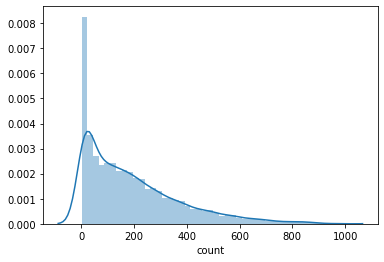

In [9]:
sns.distplot(y_target)

<AxesSubplot:xlabel='count'>

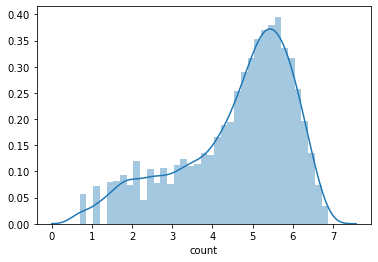

In [10]:
y_target_log = np.log1p(y_target)
sns.distplot(y_target_log)

In [11]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train)
y_preds = lr.predict(X_test)

#다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)
y_preds_exp = np.expm1(y_preds)

mse = mean_squared_error(y_test_exp, y_preds_exp)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 25039.137 , RMSE : 158.238


<AxesSubplot:>

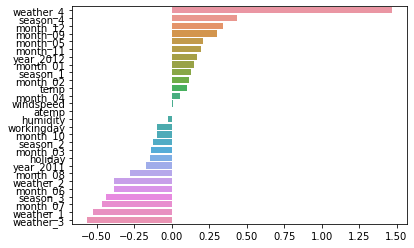

In [12]:
coef = pd.Series(lr.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

#### 4.1. Ridge

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=156)

ridge = Ridge(alpha = 10)
ridge.fit(X_train ,y_train)
y_preds = ridge.predict(X_test)

y_test_exp = np.expm1(y_test)
y_preds_exp = np.expm1(y_preds)

mse = mean_squared_error(y_test_exp, y_preds_exp)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 25019.835 , RMSE : 158.177


In [14]:
# alpha값 하이퍼파라미터튜닝
alphas = [0 , 0.1 , 1 , 10 , 100, 1000]

# alphas list 값을 iteration하면서 alpha에 따른 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    ridge.fit(X_train ,y_train)
    y_preds = ridge.predict(X_test)

    y_test_exp = np.expm1(y_test)
    y_preds_exp = np.expm1(y_preds)

    mse = mean_squared_error(y_test_exp, y_preds_exp)
    rmse = np.sqrt(mse)

    print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 25034.122 , RMSE : 158.222
MSE : 25038.797 , RMSE : 158.237
MSE : 25036.319 , RMSE : 158.229
MSE : 25019.835 , RMSE : 158.177
MSE : 24977.758 , RMSE : 158.044
MSE : 25669.325 , RMSE : 160.216


In [15]:
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train , y_train)
    
    coeff = pd.Series(data=ridge.coef_, index=X_train.columns)    
    print('alpha {0} 일 때 회귀계수 :'.format(alpha))
    print(coeff.sort_values(ascending=False))
    print()

alpha 0 일 때 회귀계수 :
season_4      4.930412e+12
weather_4     4.321943e+12
weather_2     4.321943e+12
weather_1     4.321943e+12
weather_3     4.321943e+12
month_09      3.405132e+12
month_08      3.405132e+12
month_07      3.405132e+12
season_2      2.226049e+12
month_01      6.751924e+11
month_02      6.751924e+11
month_03      6.751924e+11
season_1      2.939984e+11
temp          1.040617e-01
windspeed     5.630106e-03
atemp         3.538415e-03
humidity     -2.225256e-02
workingday   -9.608319e-02
holiday      -1.429150e-01
month_05     -1.256859e+12
month_04     -1.256859e+12
month_06     -1.256859e+12
season_3     -2.435941e+12
month_12     -3.961221e+12
month_11     -3.961221e+12
month_10     -3.961221e+12
year_2012    -6.212713e+12
year_2011    -6.212713e+12
dtype: float64

alpha 0.1 일 때 회귀계수 :
weather_4     1.365513
season_4      0.434986
month_12      0.341849
month_09      0.302393
month_05      0.205449
month_11      0.194045
year_2012     0.168839
month_01      0.149835
seas

#### 4.2 Lasso

In [16]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=156)

lasso = Lasso(alpha = 1.0)
lasso.fit(X_train ,y_train)
y_preds = lasso.predict(X_test)

y_test_exp = np.expm1(y_test)
y_preds_exp = np.expm1(y_preds)

mse = mean_squared_error(y_test_exp, y_preds_exp)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 30079.825 , RMSE : 173.435


In [17]:
# alpha값 하이퍼파라미터튜닝
alphas = [0.01, 0.07, 0.1, 0.5, 1, 3, 10]

# alphas list 값을 iteration하면서 alpha에 따른 rmse 구함.
for alpha in alphas :
    lasso = Lasso(alpha = alpha)
    
    lasso.fit(X_train ,y_train)
    y_preds = lasso.predict(X_test)

    y_test_exp = np.expm1(y_test)
    y_preds_exp = np.expm1(y_preds)

    mse = mean_squared_error(y_test_exp, y_preds_exp)
    rmse = np.sqrt(mse)

    print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 25153.285 , RMSE : 158.598
MSE : 27605.930 , RMSE : 166.150
MSE : 28603.440 , RMSE : 169.126
MSE : 29229.809 , RMSE : 170.967
MSE : 30079.825 , RMSE : 173.435
MSE : 34665.670 , RMSE : 186.187
MSE : 40495.671 , RMSE : 201.235


In [18]:
coeff_df = pd.DataFrame()
for alpha in alphas :
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train , y_train)
    
    coeff = pd.Series(data=lasso.coef_, index=X_train.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
sort_column = 'alpha:'+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0.01,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3,alpha:10
season_4,4.810379e-01,1.906262e-01,0.013826,0.000000,0.000000,0.000000,0.0
month_09,2.295762e-01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
weather_2,1.240167e-01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.0
month_05,8.931639e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
month_12,7.215908e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.0
temp,6.108987e-02,2.083620e-02,0.013038,0.000000,0.000000,0.000000,0.0
atemp,1.856183e-02,4.057000e-02,0.045332,0.051086,0.044279,0.017058,0.0
windspeed,7.192615e-03,7.026959e-03,0.005916,0.000013,0.000000,0.000000,0.0
year_2012,3.692585e-15,8.951722e-16,0.000000,0.000000,0.000000,0.000000,0.0
month_01,0.000000e+00,-0.000000e+00,-0.000000,-0.000000,-0.000000,-0.000000,-0.0


#### 4.3 ElasticNet 

In [19]:
from sklearn.linear_model import ElasticNet

alphas = [0.01, 0.07, 0.1, 0.5, 1, 3, 5]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    elsnet = ElasticNet(alpha = alpha, l1_ratio=0.7)
    
    elsnet.fit(X_train ,y_train)
    y_preds = elsnet.predict(X_test)

    y_test_exp = np.expm1(y_test)
    y_preds_exp = np.expm1(y_preds)

    mse = mean_squared_error(y_test_exp, y_preds_exp)
    rmse = np.sqrt(mse)

    print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

MSE : 25014.055 , RMSE : 158.158
MSE : 27028.265 , RMSE : 164.403
MSE : 27691.850 , RMSE : 166.409
MSE : 28988.053 , RMSE : 170.259
MSE : 29564.828 , RMSE : 171.944
MSE : 32532.565 , RMSE : 180.368
MSE : 35942.804 , RMSE : 189.586


#### 4.4 트리기반 회귀

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

In [21]:
from sklearn.metrics import mean_squared_error

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    
    y_test_exp = np.expm1(y_test)
    y_preds_exp = np.expm1(y_preds)
    
    mse = mean_squared_error(y_test_exp, y_preds_exp)
    rmse = mse**(1/2)
    
    print(model.__class__.__name__,'회귀 모델의 rmse 값:', rmse)

DecisionTreeRegressor 회귀 모델의 rmse 값: 164.01549099570394
RandomForestRegressor 회귀 모델의 rmse 값: 140.9835488265603
GradientBoostingRegressor 회귀 모델의 rmse 값: 144.21786678445085
XGBRegressor 회귀 모델의 rmse 값: 169.69399154577303
LGBMRegressor 회귀 모델의 rmse 값: 146.54940664109475


유의미하게 개선된 성능의 회귀 모델이 나오지 않네요...ㅠㅡㅠ